In [8]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [9]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_labels.shape

(60000,)

In [12]:
len(train_labels)

60000

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [14]:
test_images.shape

(10000, 28, 28)

In [15]:
len(test_labels)

10000

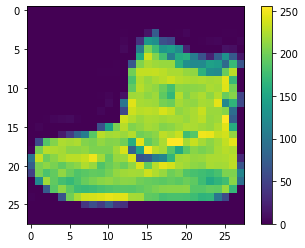

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

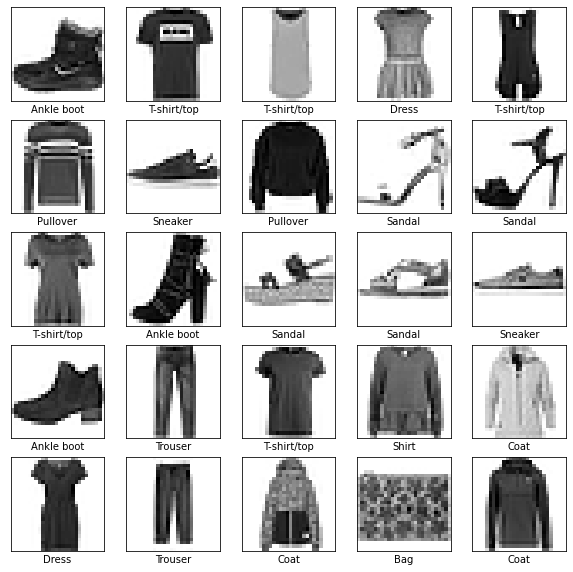

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [19]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.4997 - accuracy: 0.8242
Epoch 2/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3762 - accuracy: 0.8640
Epoch 3/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3354 - accuracy: 0.8776
Epoch 4/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3131 - accuracy: 0.8849
Epoch 5/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2938 - accuracy: 0.8915
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2804 - accuracy: 0.8955
Epoch 7/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2666 - accuracy: 0.9005
Epoch 8/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2569 - accuracy: 0.9036
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2476 - accuracy: 0.9069
Epoch 10/10
60000/60000 [============

In [22]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3359 - accuracy: 0.8801

Test accuracy: 0.8801


In [58]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [59]:
predictions = propability_model.predict(test_images)

In [60]:
predictions[0]

array([5.35967999e-08, 4.23753706e-11, 1.11572183e-08, 2.16569027e-10,
       1.43930833e-07, 2.82411347e-04, 1.17542854e-07, 1.21278763e-02,
       1.54390221e-07, 9.87589300e-01], dtype=float32)

In [61]:
np.argmax(predictions[0])

9

In [62]:
test_labels[0]

9

In [63]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

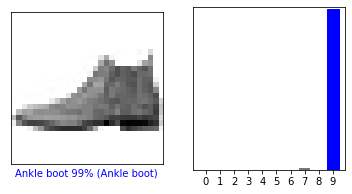

In [64]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

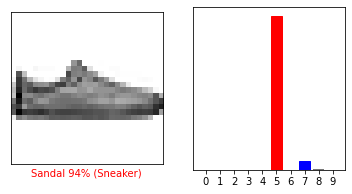

In [65]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

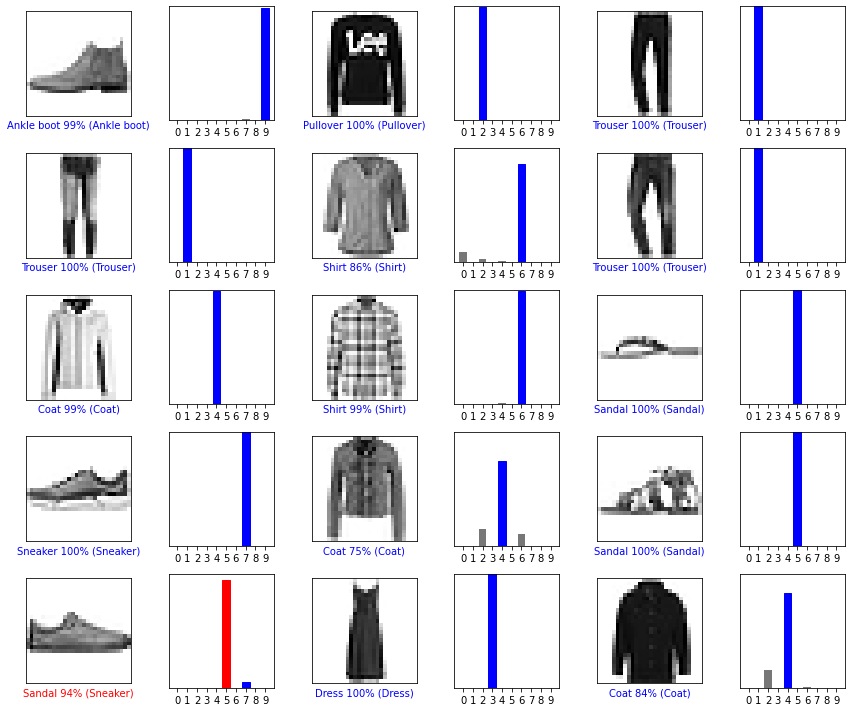

In [66]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [67]:
img = test_images[1]

print(img.shape)

(28, 28)


In [68]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [69]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[6.57937517e-06 6.95528653e-15 9.98710752e-01 1.46096335e-08
  1.92749911e-04 2.90618723e-12 1.08990981e-03 8.28493348e-18
  4.33745984e-10 1.47153082e-13]]


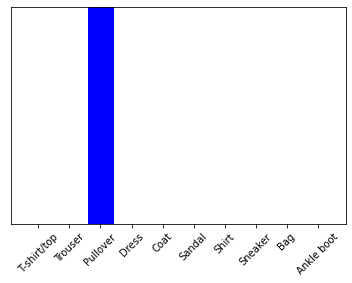

In [70]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [72]:
np.argmax(predictions_single[0])

2